In [2]:
import soundata

dataset = soundata.initialize('fsd50k')

In [3]:
#dataset.download()  # download the dataset
dataset.validate()  # validate that all the expected files are there

example_clip = dataset.choice_clip()  # choose a random example clip

 16%|█▌        | 7976/51197 [05:26<32:50, 21.93it/s]  

# Globals

In [210]:
vocabulary_path = dataset.vocabulary_path
ratings_path = dataset.pp_pnp_ratings_path
label_info_path = dataset.label_info_path
collection_vocabulary_train_path = dataset.collection_vocabulary_dev_path
collection_vocabulary_test_path = dataset.collection_vocabulary_eval_path
clips_info_train_path = dataset.clips_info_dev_path
clips_info_test_path = dataset.clips_info_eval_path
default_train_path = dataset.collection_eval_path
ground_truth_train_path = dataset.ground_truth_dev_path
ground_truth_est_path = dataset.ground_truth_eval_path

slice_lenght= 48000


# Imports

In [203]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import soundfile
from scipy import signal
import IPython.display as ipd
import librosa, librosa.display
import pandas as pd
import tensorflow as tf
import tensorflow_io as tfio
from functions import plot_spectogram,preprocess,plot_wave,calculate_spectogram,normalize_audio

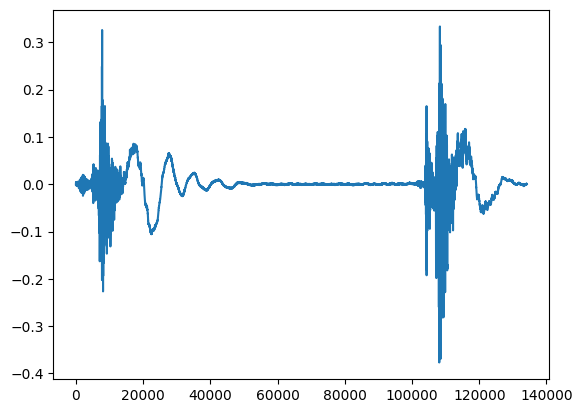

In [78]:
example_clip = dataset.choice_clip()
plot_wave(example_clip)

In [79]:
spectogram = calculate_spectogram(example_clip)
ipd.Audio(data=example_clip.audio[0],rate=example_clip.audio[1])

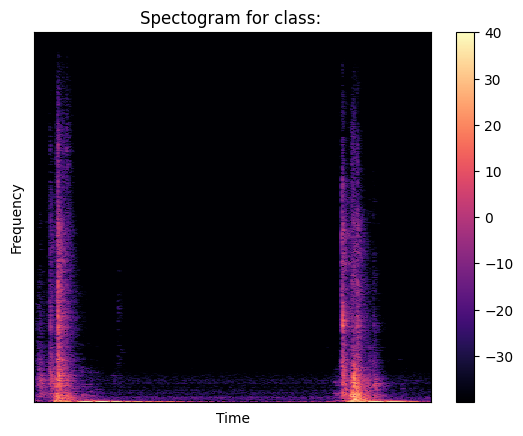

In [80]:
log_spectogram = librosa.amplitude_to_db(spectogram)
plot_spectogram(log_spectogram,sr=example_clip.audio[1],hop_lenght=512)

In [73]:
log_spectogram.shape

(1025, 1601)

In [264]:
vocabulary = pd.read_csv(vocabulary_path)
vocabulary = vocabulary.rename(columns={"Accelerating_and_revving_and_vroom":"labels"})

vocabulary = vocabulary.append({"0": len(vocabulary) + 1, "labels": "Accelerating_and_revving_and_vroom", "/m/07q2z82": "/m/07q2z82"}, ignore_index=True)
vocabulary.head()


C:\Users\there\AppData\Local\Temp\ipykernel_34792\1280058313.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vocabulary = vocabulary.append({"0": len(vocabulary) + 1, "labels": "Accelerating_and_revving_and_vroom", "/m/07q2z82": "/m/07q2z82"}, ignore_index=True)


,0,labels,/m/07q2z82
0,1,Accordion,/m/0mkg
1,2,Acoustic_guitar,/m/042v_gx
2,3,Aircraft,/m/0k5j
3,4,Alarm,/m/07pp_mv
4,5,Animal,/m/0jbk


In [93]:
collection_vocabulary_train  = pd.read_csv(collection_vocabulary_train_path)
collection_vocabulary_train.head()

,0,Accelerating_and_revving_and_vroom,/m/07q2z82
0,1,Accordion,/m/0mkg
1,2,Acoustic_guitar,/m/042v_gx
2,3,Air_conditioning,/m/025wky1
3,4,Air_horn_and_truck_horn,/m/05x_td
4,5,Aircraft,/m/0k5j


In [97]:
label_info = pd.read_json(label_info_path)
label_info.head()

,/m/0dv3j,/m/0brhx,/m/0316dw,/m/018vs,/m/0bm02,/m/0ngt1,/m/0jb2l,/m/02sgy,/m/07pb8fc,/m/07pjwq1,...,/m/07rkbfh,/m/02y_763,/m/07p7b8y,/m/03qc9zr,/m/07pggtn,/m/02jz0l,/m/0btp2,/m/03dnzn,/m/03wwcy,/m/07k1x
faq,"<div class=""ui accordion"">\r\n\r\n class=""titl...","<div class=""ui accordion"">\r\n\r\n class=""titl...","<div class=""ui accordion"">\r\n class=""titl...","<div class=""ui accordion"">\r\n class=""title"">\...","<div class=""ui accordion"">\r\n class=""title...","<div class=""ui accordion"">\r\n \r\n class=""ti...","<div class=""ui accordion"">\r\n class=""titl...","<div class=""ui accordion"">\r\n\r\n ...","<div class=""ui accordion"">\r\n clas...","<div class=""ui accordion"">\r\n\r\n\r\n cla...",...,"<div class=""ui accordion"">\r\n\r\n class=""...","<div class=""ui accordion"">\r\n clas...","<div class=""ui accordion"">\r\n\r\n class=""titl...","<div class=""ui accordion"">\r\n class=""title"">\...","<div class=""ui accordion"">\r\n\r\n ...","<div class=""ui accordion"">\r\n\r\n class=""titl...","<div class=""ui accordion"">\r\n\r\n class=""...","<div class=""ui accordion"">\r\n\r\n class=""...","<div class=""ui accordion"">\r\n\r\n\r\n cla...","<div class=""ui accordion"">\r\n\r\n\r\n class=""..."
examples,"[16584, 217206]","[256370, 256368, 256359]","[348239, 201893, 324120, 345955]","[9201, 31673]","[38903, 78815]","[348076, 237412]","[64460, 50362]","[4282, 134012]","[216563, 50455]","[266592, 79931]",...,"[69869, 259605]","[208718, 148325]","[212736, 50688]","[180309, 351631]","[9327, 85402]","[233061, 333108, 344557, 235624]","[349386, 233042]","[389621, 324773, 143619, 332280]","[196379, 275571, 223672]","[135847, 108582, 84419]"
verification_examples,"[212610, 351274, 371075, 68741]",[2832],"[145492, 329052, 348240, 332179]","[40289, 239861, 162941, 162936]","[90623, 90621, 41420, 36004, 3166, 41148]","[251635, 21887, 151200, 159769]","[123359, 26712, 40808, 50368, 37348, 240368, 2...","[63900, 74871, 40403, 97244, 40474, 97242]","[186939, 106487, 50454, 106486, 165281, 50661]","[79007, 157919, 202250, 134813]",...,"[266192, 199658, 347537, 340165, 235404, 21210...","[335737, 321972, 325585]","[383264, 68716, 212742, 186692, 108429]","[180305, 180344, 355741, 163729, 9430, 360465]","[353446, 254082, 58568, 339326]","[212116, 344559, 318931, 420942, 143247]","[376994, 82490, 50869, 349386]","[121541, 211818, 85901, 71574, 322391]","[196375, 196378, 196373, 223673, 319041, 76925]","[108582, 81097, 340593, 328753, 108588]"


In [105]:
clips_info_train = pd.read_json(clips_info_train_path)


In [106]:
clips_info_train.head()

,425873,420945,431448,410343,420940,46138,415439,415438,415431,415430,...,107514,107515,198584,83116,366453,178844,170897,238402,96202,201611
title,water baltic sea foley water run in fast splas...,Guitar Riff Pentablues.wav,punch_plastic_out_2.wav,Roar.wav,Washing machine 1,scooter.wav,Harp Run with Wind Chimes and Birds.wav,Harp Up Run 1.wav,Harp Tinkly Riff 3.wav,Harp Strumming Riff 9.wav,...,toyxlo5.wav,toyxlo6.wav,Loop 1 drop,Manthey-A2.WAV,Bubble Wrap.wav,papertearing.wav,stream2.WAV,ClosingDoor.wav,WS_30068.wav,FAUGERON_Amandine_2013_2014_son5.wav
description,This sound effect was recorded with high quali...,A pentacblues guitar riff made with shreddage ...,Punch being pulled out of 64oz plastic container.,This is a variation on a guttural growl I made...,Recording of my washing machine.,scooter in a streetrecorded with MD sony and s...,Melodic Snippets from recordings of me playing...,Melodic Snippets from recordings of me playing...,Melodic Snippets from recordings of me playing...,Melodic Snippets from recordings of me playing...,...,Multisample hits from a toy xylophone recorded...,Multisample hits from a toy xylophone recorded...,A Drop loop.,"My childhood piano, an old German upright. Rec...",Popping bubble wrap.,Tearing and crumpling paper towels.,close mic recording of falls and stream at Sug...,This sound is part of the sound creation that ...,fart poot gas flatulence flatulation explosion...,///Made using Audacity (only)\r\nGenerate Chir...
tags,"[splashes, foley, soundscape, baltic, ambience...","[strings, rock, shred, metal, overdriven, rool...","[tools, clunk, thunk, plastic, pop, punch]","[roaring, wild, animal, snarl, lion, tiger, gr...","[clothes, electrical, dryer, wash, machine, ap...","[motor, scooter]","[harp, strings, melody, swar-sangam, ethnic, s...","[harp, strings, melody, swar-sangam, ethnic, s...","[harp, strings, melody, swar-sangam, ethnic, s...","[harp, strings, melody, swar-sangam, ethnic, s...",...,"[instrument, multisample, toy, xylophone]","[instrument, multisample, toy, xylophone]","[electric-dance-music, 4x4-records, drum, clos...","[german, multi, old, piano]","[popping, bubble, bubbles, bubblewrap, wrap, r...","[stereo, tear, rip, fold, paper, paper-towel, ...","[field-recording, stream, fall, brook, virgini...","[door, house, upf-cs14, home, close, closing]","[explosion, fart, flatulation, flatulence, gas...","[siren, alarm, synth]"
license,http://creativecommons.org/licenses/by/3.0/,http://creativecommons.org/licenses/by-nc/3.0/,http://creativecommons.org/publicdomain/zero/1.0/,http://creativecommons.org/publicdomain/zero/1.0/,http://creativecommons.org/licenses/by/3.0/,http://creativecommons.org/licenses/by-nc/3.0/,http://creativecommons.org/publicdomain/zero/1.0/,http://creativecommons.org/publicdomain/zero/1.0/,http://creativecommons.org/publicdomain/zero/1.0/,http://creativecommons.org/publicdomain/zero/1.0/,...,http://creativecommons.org/licenses/by/3.0/,http://creativecommons.org/licenses/by/3.0/,http://creativecommons.org/licenses/by/3.0/,http://creativecommons.org/publicdomain/zero/1.0/,http://creativecommons.org/licenses/by-nc/3.0/,http://creativecommons.org/publicdomain/zero/1.0/,http://creativecommons.org/licenses/by-nc/3.0/,http://creativecommons.org/licenses/by/3.0/,http://creativecommons.org/licenses/by/3.0/,http://creativecommons.org/publicdomain/zero/1.0/
uploader,Soundholder,Mrthenoronha,StarTowerStudio,waxsocks,Cigaro30,arnaud coutancier,luckylittleraven,luckylittleraven,luckylittleraven,luckylittleraven,...,NoiseCollector,NoiseCollector,Goup_1,Meg,Genevieve_Lupke,j1987,b0bd0bbs,amorralteixe,IFartInUrGeneralDirection,univ_lyon3


In [113]:
ground_truth_train  = pd.read_csv(ground_truth_train_path)
ground_truth_train.head(n=50)

,fname,labels,mids,split
0,64760,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",train
1,16399,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",train
2,16401,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",train
3,16402,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",train
4,16404,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",train
5,345111,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",val
6,64761,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",train
7,268259,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",train
8,64762,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",train
9,160826,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",val


In [132]:
ground_truth_test  = pd.read_csv(ground_truth_est_path)
ground_truth_test.head(n=50)

,fname,labels,mids
0,37199,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf"
1,175151,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf"
2,253463,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf"
3,329838,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf"
4,1277,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf"
5,30149,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf"
6,331398,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf"
7,333246,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf"
8,232924,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf"
9,42378,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf"


# Save data with labels

In [266]:
audio_data = dataset.load_clips()
audio_data_df = pd.DataFrame(columns=["label", "path"])

for audio in audio_data:
    # get labels
    row = ground_truth_train.loc[ground_truth_train['fname'] == int(audio)]
    if(row.empty):
        row = ground_truth_test.loc[ground_truth_test['fname'] == int(audio)]

    labels = row["labels"].tolist()[0]
    if len(row["labels"].tolist()) >0:
        labels = row["labels"].tolist()[0].split(',')
    label_code = vocabulary.loc[vocabulary["labels"] == labels[0]].index.astype(int)[0]
    audio_clip, sr = audio_data[audio].audio
    new_entry = {"label": label_code, "path": audio_data[audio].audio_path}
    audio_data_df=pd.concat([audio_data_df, pd.DataFrame([new_entry])], ignore_index=True)

,label,path
0,35,/tmp\sound_datasets\fsd50k\FSD50K.dev_audio/47...
1,198,/tmp\sound_datasets\fsd50k\FSD50K.dev_audio/20...
2,18,/tmp\sound_datasets\fsd50k\FSD50K.dev_audio/15...
3,194,/tmp\sound_datasets\fsd50k\FSD50K.dev_audio/37...
4,177,/tmp\sound_datasets\fsd50k\FSD50K.dev_audio/22...
5,167,/tmp\sound_datasets\fsd50k\FSD50K.dev_audio/18...
6,106,/tmp\sound_datasets\fsd50k\FSD50K.dev_audio/21...
7,131,/tmp\sound_datasets\fsd50k\FSD50K.dev_audio/77...
8,19,/tmp\sound_datasets\fsd50k\FSD50K.dev_audio/37...
9,69,/tmp\sound_datasets\fsd50k\FSD50K.dev_audio/11...


In [267]:
audio_data_df.to_csv("audio_data.csv", index=False) 

In [276]:
class_counts = audio_data_df["label"].value_counts()

# Print the class counts
print(class_counts)

194    2627
18     2025
110     857
125     834
106     771
       ... 
171       8
127       6
128       3
119       1
132       1
Name: label, Length: 199, dtype: int64


In [299]:
threshold_min = class_counts.mean()  
threshold_max = 700
# Filter out classes with counts less than the threshold
filtered_df = audio_data_df[audio_data_df["label"].isin(class_counts[class_counts <= threshold_max].index)]
filtered_df = filtered_df[filtered_df["label"].isin(class_counts[class_counts >= threshold_min].index)]


In [300]:

class_counts_filter = filtered_df["label"].value_counts()
class_counts_filter

68     687
1      667
180    635
72     629
160    589
      ... 
137    279
47     276
140    275
87     273
7      268
Name: label, Length: 67, dtype: int64

In [250]:
example_clip = dataset.choice_clip()
wav = example_clip.audio[0]
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav,wav, sequence_length=slice_lenght, sequence_stride=slice_lenght,batch_size=1)

In [251]:
samples, index = audio_slices.as_numpy_iterator().next()
sample_normal = normalize_audio(samples[0])

In [252]:

ipd.Audio(data=sample_normal,rate=example_clip.audio[1])

In [253]:
ipd.Audio(data=samples[0],rate=example_clip.audio[1])

In [254]:
mel_spec, label = preprocess(samples,1, example_clip.audio[1],128, slice_lenght)
plt.figure()
mel_spec.shape

TensorShape([1, 375, 128])

<Figure size 640x480 with 0 Axes>

In [1]:
train, validate, test = np.split(audio_data_df.sample(frac=1, random_state=42), [int(.6*len(audio_data_df)), int(.8*len(audio_data_df))])

NameError: name 'np' is not defined